<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/imbalanced_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
#necessary initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [108]:
#datasets
from sklearn.datasets import make_blobs
n_samples_1 = 25
n_samples_2 = 375
centers_1 = [[0, 0]]
centers_2 = [[2, 2]]
cluster_std = [1.5, 1.5]

# Combine centers for both blobs
centers = centers_1 + centers_2

# Generate blobs
X, Y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  cluster_std=cluster_std,
                  centers=centers,
                  random_state=42)
df= pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = Y
df.head()
df['y'].value_counts()

,count
y,
1,375
0,25


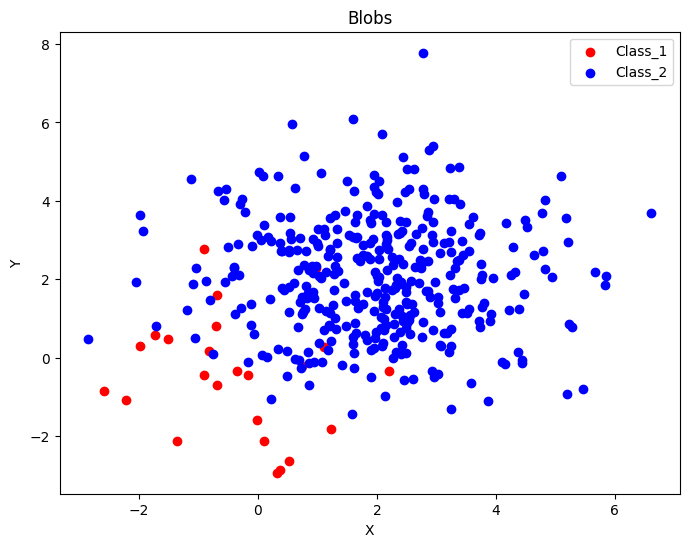

Shape of X: (400, 2)
Shape of Y: (400,)
1    375
0     25
Name: count, dtype: int64


In [109]:
# generate visuals
def blob(X,Y):
  plt.figure(figsize= (8,6))
  plt.scatter(X[Y==0][:,0], X[Y==0][:,1], color= "red", label= "Class_1")
  plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color= "blue", label= "Class_2")
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Blobs')
  plt.legend()
  plt.show()
  print('Shape of X:', X.shape)
  print('Shape of Y:', Y.shape)
  #value count
  print(pd.Series(Y).value_counts())
blob(X,Y)

Text(0, 0.5, 'x2')

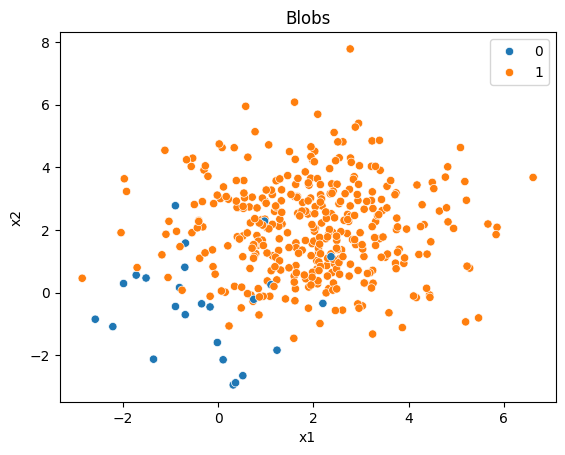

In [110]:
sns.scatterplot(x= 'x1', y= 'x2', hue= 'y', data= df)
plt.title('Blobs')
plt.xlabel('x1')
plt.legend()
plt.ylabel('x2')

In [111]:
#model_1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
Y_pred_1= model_1.predict(X_test)
Y_pred_prob_1= model_1.predict_proba(X_test)[:,1]

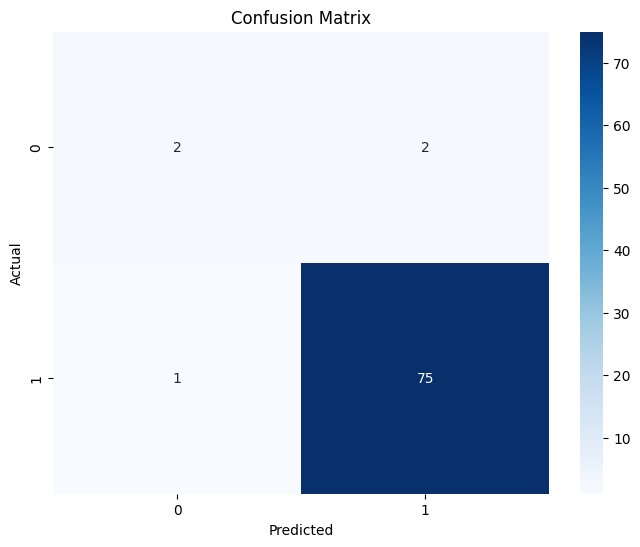

0.9625
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.97      0.99      0.98        76

    accuracy                           0.96        80
   macro avg       0.82      0.74      0.78        80
weighted avg       0.96      0.96      0.96        80



In [112]:
# as its classification problem we use classification metrics
# accuracy_score, confusion_matric, classification_report-precision and recall , AUC-ROC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, Y_pred_1)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax)

# Label the primary axes
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(accuracy_score(y_test, Y_pred_1))

print(classification_report(y_test, Y_pred_1))


In [55]:
len(roc_curve(y_test, Y_pred_prob_1))

3

[       inf 0.99999835 0.99452637 0.99404691 0.8216294  0.81238004
 0.65456529 0.16069785 0.08530268 0.02831093]


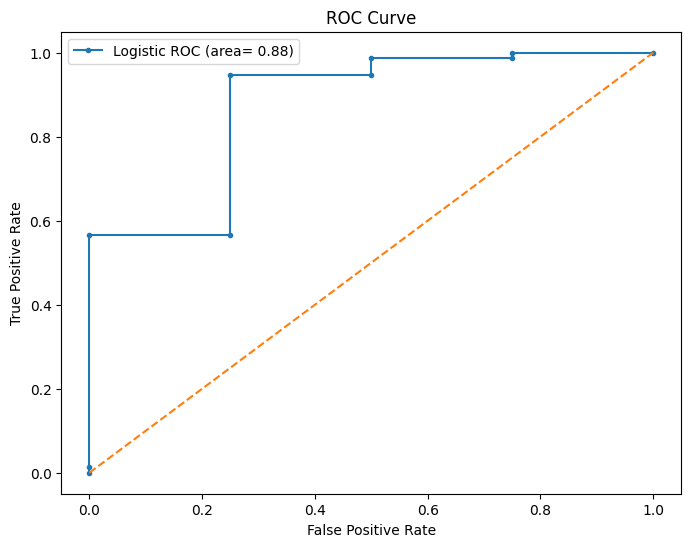

In [113]:
#roc- crve for checking threshold of classification
def plot_roc_curve(fpr, tpr,y_test, Y_pred_prob_1):
  fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob_1)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, marker='.', label='Logistic ROC (area= %0.2f)' %roc_auc_score(y_test, Y_pred_prob_1) )
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.title('ROC Curve')
  print(thresholds)

plot_roc_curve(fpr, tpr,y_test, Y_pred_prob_1)

from data in ratio 25:375 having a biasedness. model_1 predicts 96% as more of 375 one was predicted accurately due to more size.
we see PRECISION and RECALL OF 1 is 0.99 & 0.97 and that of 0 around 0.5 indicating imbalance



Shape of X: (400, 2)
Shape of y: (400,)


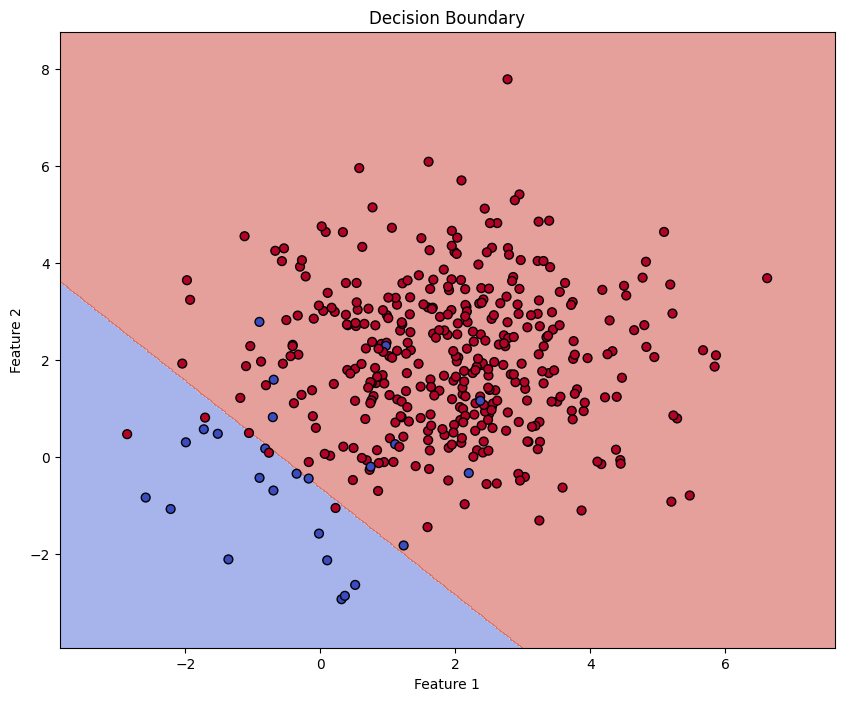

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Check and print the shape of X and y
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

    # Check if X has two features (columns)
    if X.shape[1] != 2:
        raise ValueError("Input X must have exactly 2 features to plot the decision boundary.")

    plt.figure(figsize=(10, 8))

    # Define the boundaries of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    plot_step = 0.02

    # Generate meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Predict class for every point in the meshgrid
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, z, alpha=0.5, cmap=plt.cm.coolwarm)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=40, cmap=plt.cm.coolwarm)

    # Add titles and labels
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Display the plot
    plt.show()

# Example usage (make sure the model is trained before calling this function)
plot_decision_boundary(model_1, X, Y)


**Random undersampling**

In [115]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)


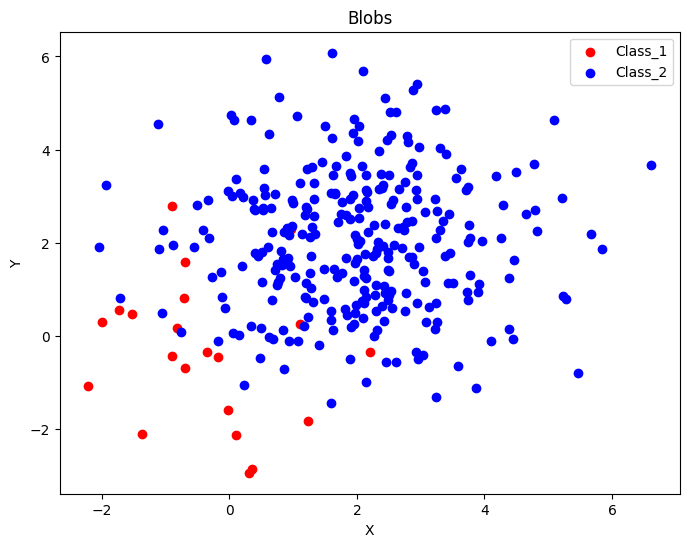

Shape of X: (320, 2)
Shape of Y: (320,)
1    299
0     21
Name: count, dtype: int64


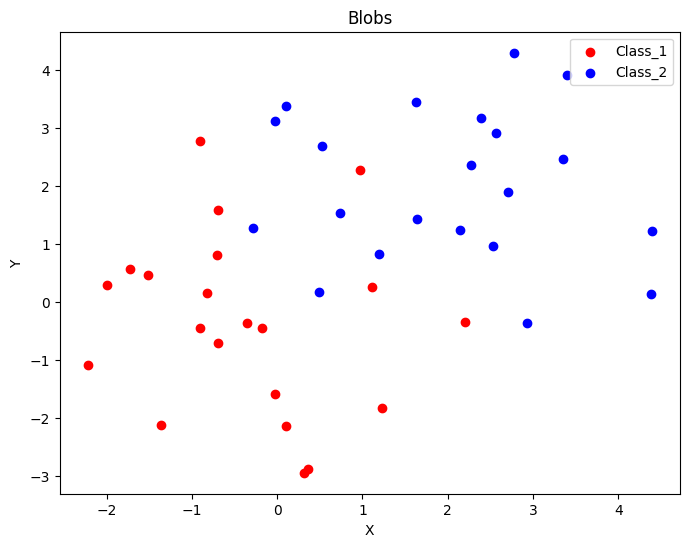

Shape of X: (42, 2)
Shape of Y: (42,)
0    21
1    21
Name: count, dtype: int64


In [116]:
#plotting dataset
blob(X_train, y_train)
blob(X_rus_train, y_rus_train)

In [117]:
#modelling rus
model_2 = LogisticRegression()
model_2.fit(X_rus_train, y_rus_train)
Y_pred_2= model_2.predict(X_test)
Y_pred_prob_2= model_2.predict_proba(X_test)[:,1]

In [118]:
y_test.shape, Y_pred_2.shape

((80,), (80,))

0.8625
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.97      0.99      0.98        76

    accuracy                           0.96        80
   macro avg       0.82      0.74      0.78        80
weighted avg       0.96      0.96      0.96        80

              precision    recall  f1-score   support

           0       0.23      0.75      0.35         4
           1       0.99      0.87      0.92        76

    accuracy                           0.86        80
   macro avg       0.61      0.81      0.64        80
weighted avg       0.95      0.86      0.89        80

[       inf 0.99989974 0.90502525 0.89748983 0.2981749  0.25545452
 0.12837817 0.02292507 0.00984664 0.00373778]
Shape of X: (80, 2)
Shape of y: (80,)


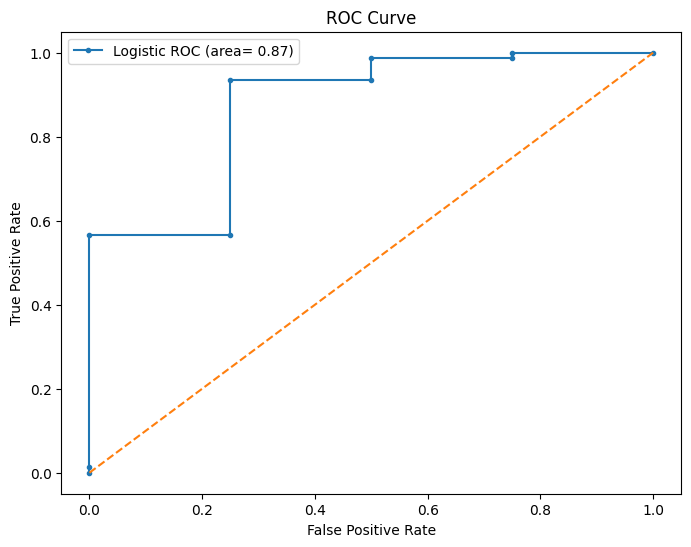

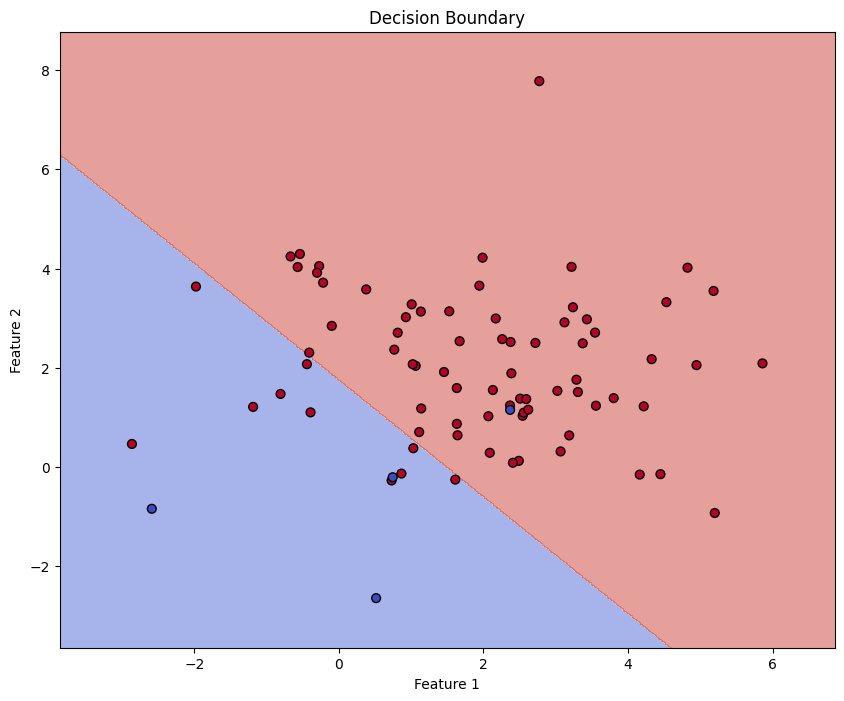

In [119]:
print(accuracy_score(y_test, Y_pred_2))
print(classification_report(y_test, Y_pred_1))
print(classification_report(y_test, Y_pred_2))
fpr2, tpr2, thresholds2 = roc_curve(y_test, Y_pred_prob_2)
plot_roc_curve(fpr2, tpr2,y_test, Y_pred_prob_2 )
plot_decision_boundary(model_2, X_test, y_test)

**Random oversampling**

In [120]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)

In [121]:
#modelling3
model3= LogisticRegression()
model3.fit(X_ros_train, y_ros_train)
Y_pred_3= model3.predict(X_test)
Y_pred_prob_3= model3.predict_proba(X_test)[:,1]

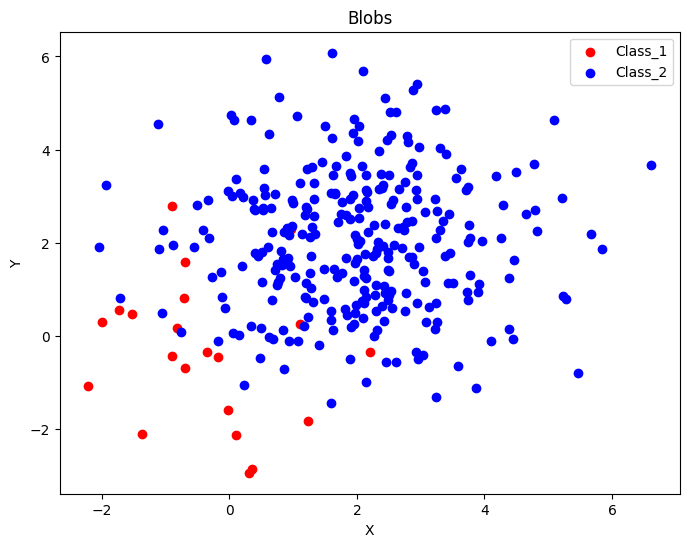

Shape of X: (320, 2)
Shape of Y: (320,)
1    299
0     21
Name: count, dtype: int64


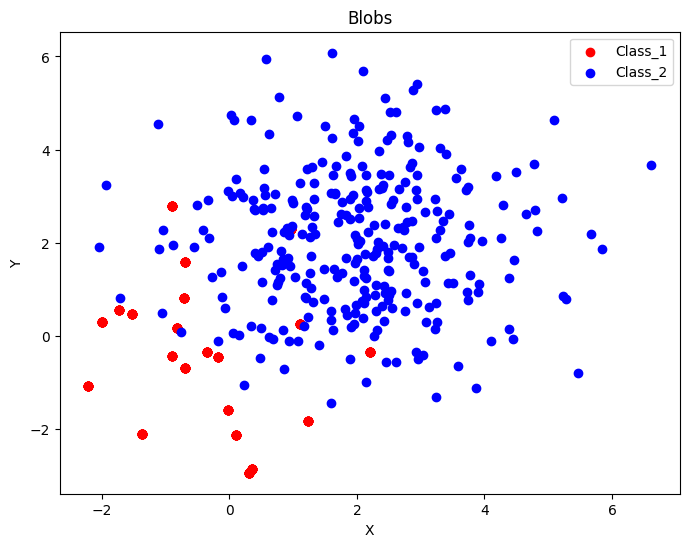

Shape of X: (598, 2)
Shape of Y: (598,)
1    299
0    299
Name: count, dtype: int64


In [122]:
#plotting dataset
blob(X_train, y_train)
blob(X_ros_train, y_ros_train)

0.8625
              precision    recall  f1-score   support

           0       0.23      0.75      0.35         4
           1       0.99      0.87      0.92        76

    accuracy                           0.86        80
   macro avg       0.61      0.81      0.64        80
weighted avg       0.95      0.86      0.89        80

              precision    recall  f1-score   support

           0       0.23      0.75      0.35         4
           1       0.99      0.87      0.92        76

    accuracy                           0.86        80
   macro avg       0.61      0.81      0.64        80
weighted avg       0.95      0.86      0.89        80

[       inf 0.99996551 0.92653407 0.92146137 0.28671889 0.24051654
 0.10813034 0.01585127 0.00594483 0.00203023]
Shape of X: (80, 2)
Shape of y: (80,)


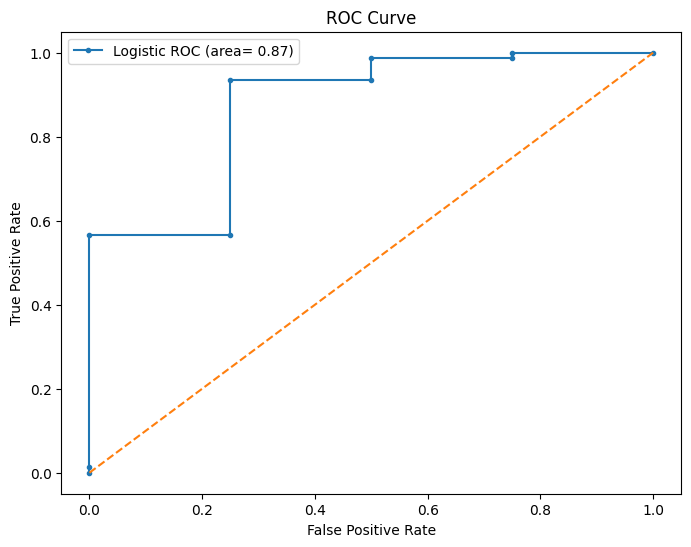

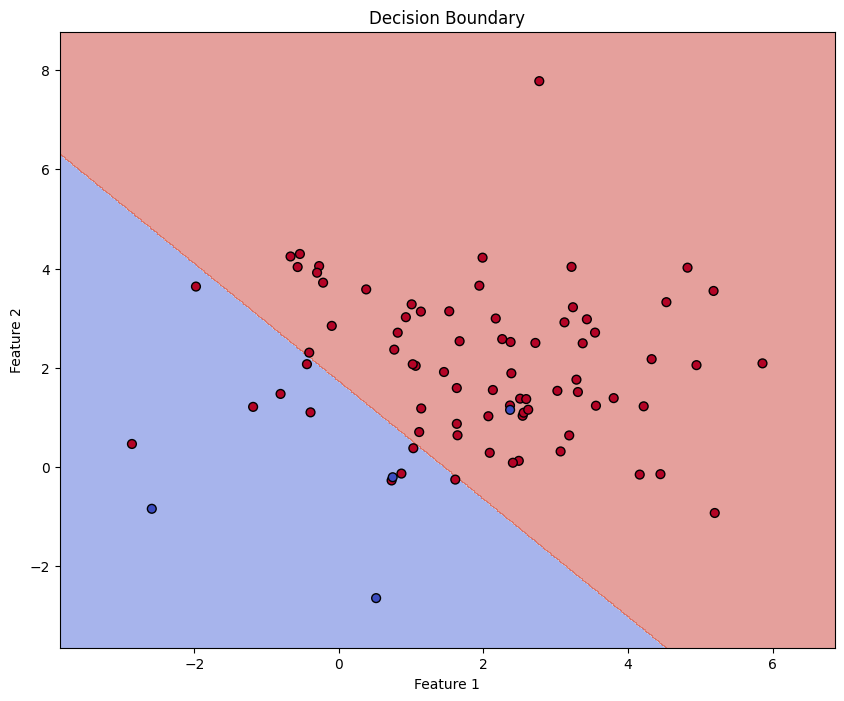

In [123]:
print(accuracy_score(y_test, Y_pred_3))
print(classification_report(y_test, Y_pred_2))
print(classification_report(y_test, Y_pred_3))
fpr3, tpr3, thresholds3 = roc_curve(y_test, Y_pred_prob_3)
plot_roc_curve(fpr3, tpr3,y_test, Y_pred_prob_3)
plot_decision_boundary(model3, X_test, y_test)

**SMOTE**

In [124]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

In [125]:
#modelling_4
model_4= LogisticRegression()
model_4.fit(X_smote_train, y_smote_train)
Y_pred_4= model_4.predict(X_test)
Y_pred_prob_4= model_4.predict_proba(X_test)[:,1]

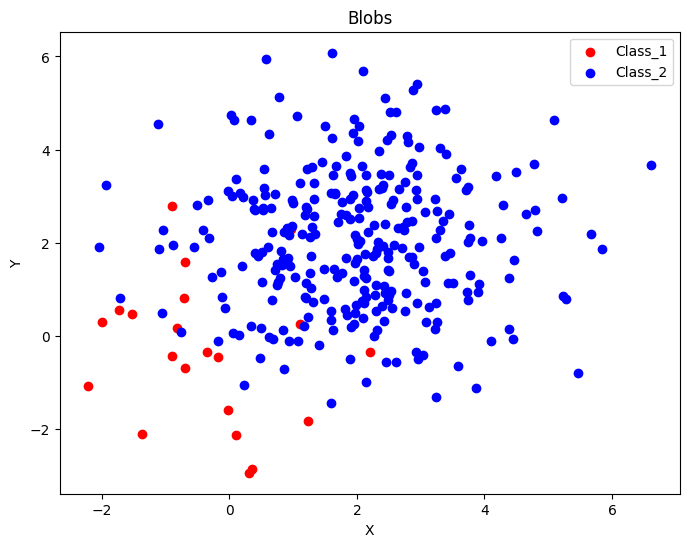

Shape of X: (320, 2)
Shape of Y: (320,)
1    299
0     21
Name: count, dtype: int64


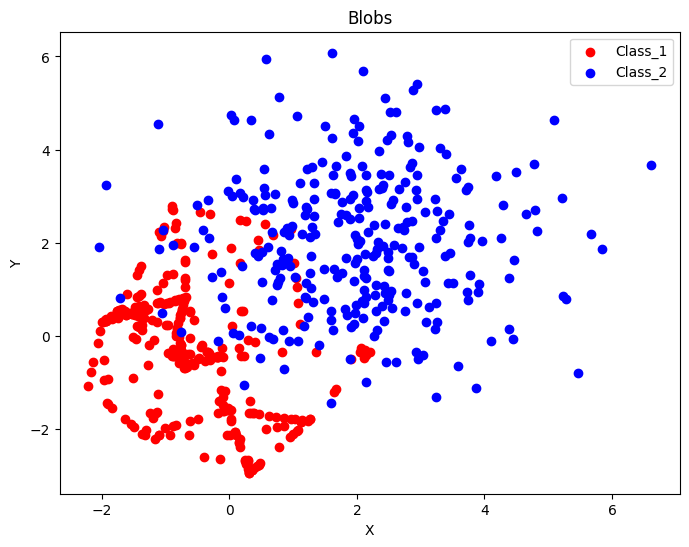

Shape of X: (598, 2)
Shape of Y: (598,)
1    299
0    299
Name: count, dtype: int64


In [126]:
#plotting dataset
blob(X_train, y_train)
blob(X_smote_train, y_smote_train)

0.8875
[[ 3  1]
 [ 8 68]]
              precision    recall  f1-score   support

           0       0.23      0.75      0.35         4
           1       0.99      0.87      0.92        76

    accuracy                           0.86        80
   macro avg       0.61      0.81      0.64        80
weighted avg       0.95      0.86      0.89        80

              precision    recall  f1-score   support

           0       0.27      0.75      0.40         4
           1       0.99      0.89      0.94        76

    accuracy                           0.89        80
   macro avg       0.63      0.82      0.67        80
weighted avg       0.95      0.89      0.91        80

[           inf 9.99993974e-01 9.73079291e-01 9.70974201e-01
 3.16047069e-01 3.11023697e-01 8.89248679e-02 1.69689520e-02
 2.47972714e-03 8.35752004e-04]
Shape of X: (80, 2)
Shape of y: (80,)


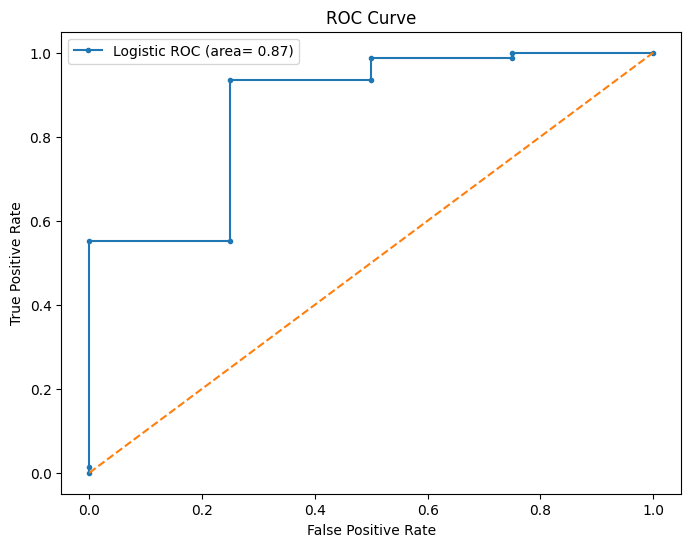

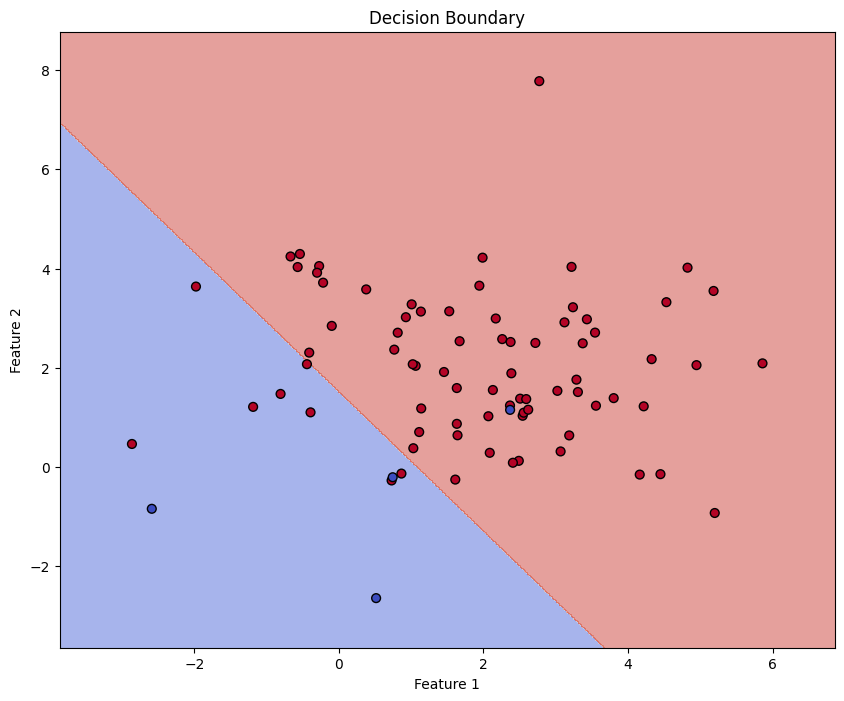

In [130]:
print(accuracy_score(y_test, Y_pred_4))
cm = confusion_matrix(y_test, Y_pred_4)
print(cm)
print(classification_report(y_test, Y_pred_3))
print(classification_report(y_test, Y_pred_4))
fpr4, tpr4, thresholds4 = roc_curve(y_test, Y_pred_prob_4)
plot_roc_curve(fpr4, tpr4,y_test, Y_pred_prob_4)
plot_decision_boundary(model_4, X_test, y_test)

**Balanced Random Forest**

In [131]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42)

In [132]:
#modelling_5

Y_pred_5= brf.predict(X_test)
Y_pred_prob_5= brf.predict_proba(X_test)[:,1]

In [ ]:
#plotting dataset
blob(X_train, y_train)
blob(X_smote_train, y_smote_train)

0.7875
[[ 3  1]
 [16 60]]
              precision    recall  f1-score   support

           0       0.27      0.75      0.40         4
           1       0.99      0.89      0.94        76

    accuracy                           0.89        80
   macro avg       0.63      0.82      0.67        80
weighted avg       0.95      0.89      0.91        80

              precision    recall  f1-score   support

           0       0.16      0.75      0.26         4
           1       0.98      0.79      0.88        76

    accuracy                           0.79        80
   macro avg       0.57      0.77      0.57        80
weighted avg       0.94      0.79      0.85        80

[ inf 1.   0.99 0.98 0.97 0.96 0.93 0.73 0.72 0.68 0.65 0.61 0.56 0.54
 0.53 0.36 0.33 0.19 0.15 0.05 0.04]
Shape of X: (80, 2)
Shape of y: (80,)


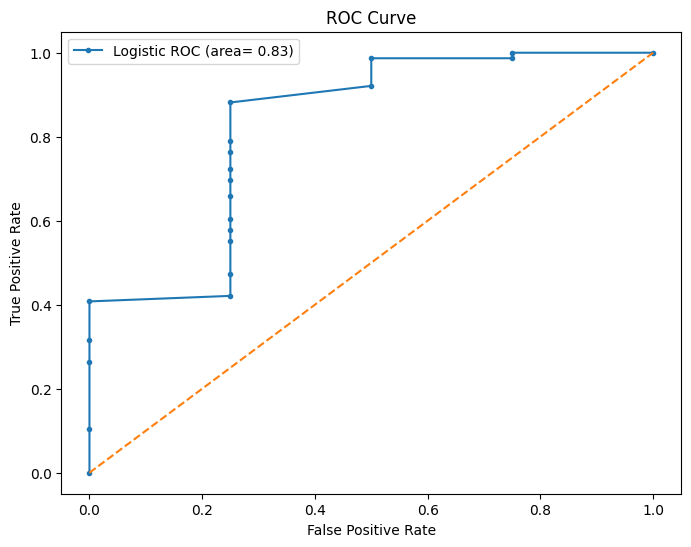

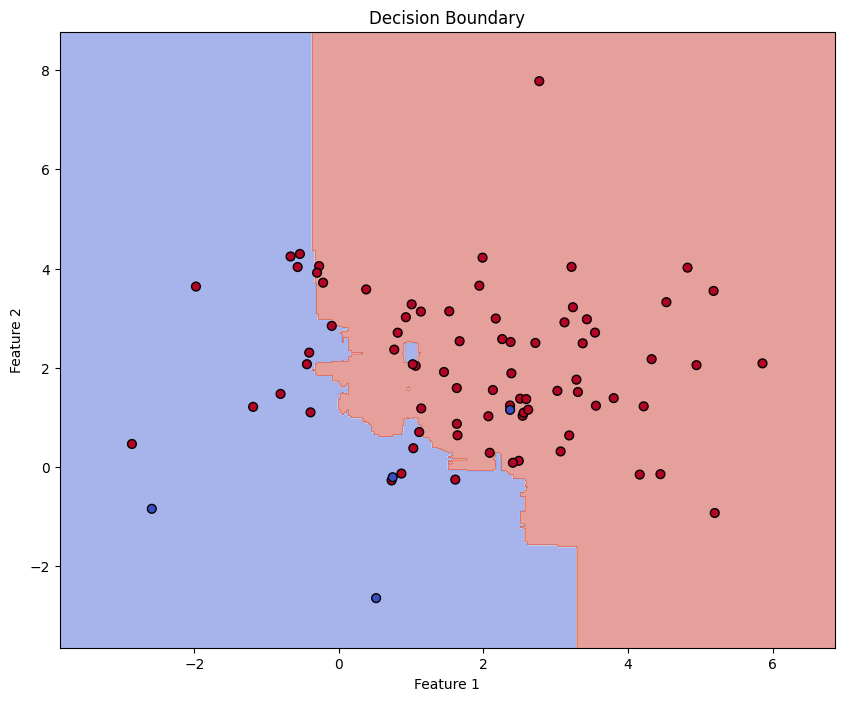

In [133]:
print(accuracy_score(y_test, Y_pred_5))
cm = confusion_matrix(y_test, Y_pred_5)
print(cm)
print(classification_report(y_test, Y_pred_4))
print(classification_report(y_test, Y_pred_5))
fpr4, tpr4, thresholds4 = roc_curve(y_test, Y_pred_prob_5)
plot_roc_curve(fpr4, tpr4,y_test, Y_pred_prob_5)
plot_decision_boundary(brf, X_test, y_test)